In [1]:
!unzip "/content/DATASET_PRJ.zip"

Streaming output truncated to the last 5000 lines.
  inflating: DATASET_PRJ/AUTISTIC/LEFT_EYE/0885.jpg  
  inflating: DATASET_PRJ/AUTISTIC/LEFT_EYE/0886.jpg  
  inflating: DATASET_PRJ/AUTISTIC/LEFT_EYE/0887.jpg  
  inflating: DATASET_PRJ/AUTISTIC/LEFT_EYE/0888.jpg  
  inflating: DATASET_PRJ/AUTISTIC/LEFT_EYE/0889.jpg  
  inflating: DATASET_PRJ/AUTISTIC/LEFT_EYE/0890.jpg  
  inflating: DATASET_PRJ/AUTISTIC/LEFT_EYE/0891.jpg  
  inflating: DATASET_PRJ/AUTISTIC/LEFT_EYE/0892.jpg  
  inflating: DATASET_PRJ/AUTISTIC/LEFT_EYE/0893.jpg  
  inflating: DATASET_PRJ/AUTISTIC/LEFT_EYE/0894.jpg  
  inflating: DATASET_PRJ/AUTISTIC/LEFT_EYE/0895.jpg  
  inflating: DATASET_PRJ/AUTISTIC/LEFT_EYE/0896.jpg  
  inflating: DATASET_PRJ/AUTISTIC/LEFT_EYE/0897.jpg  
  inflating: DATASET_PRJ/AUTISTIC/LEFT_EYE/0898.jpg  
  inflating: DATASET_PRJ/AUTISTIC/LEFT_EYE/0899.jpg  
  inflating: DATASET_PRJ/AUTISTIC/LEFT_EYE/0900.jpg  
  inflating: DATASET_PRJ/AUTISTIC/LEFT_EYE/0901.jpg  
  inflating: DATASET_PRJ/AUTIST

In [3]:
import os
import shutil
import random
from PIL import Image

# Set paths
data_dir = '/content/DATASET_PRJ'
train_dir = '/content/DATASET_PRJ/train'
valid_dir = '/content/DATASET_PRJ/valid'
test_dir = '/content/DATASET_PRJ/test'

# Image resize dimensions
resize_size = (640,640)

# Create train, valid, and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split ratio
train_ratio = 0.7
valid_ratio = 0.2
test_ratio = 0.1

# Main classes and subfolders (adjust if necessary)
classes = ['AUTISTIC', 'NON AUTISTIC']
subfolders = ['LEFT_EYE', 'RIGHT_EYE']

for main_class in classes:
    for subfolder in subfolders:
        source_folder = os.path.join(data_dir, main_class, subfolder)

        if not os.path.exists(source_folder):
            print(f"Warning: {source_folder} does not exist. Skipping this folder.")
            continue

        # Create subfolders in train, valid, and test directories
        os.makedirs(os.path.join(train_dir, main_class, subfolder), exist_ok=True)
        os.makedirs(os.path.join(valid_dir, main_class, subfolder), exist_ok=True)
        os.makedirs(os.path.join(test_dir, main_class, subfolder), exist_ok=True)

        # Get list of images in the subfolder
        images = os.listdir(source_folder)
        random.shuffle(images)

        # Split images based on the ratios
        train_split = int(train_ratio * len(images))
        valid_split = int((train_ratio + valid_ratio) * len(images))

        train_images = images[:train_split]
        valid_images = images[train_split:valid_split]
        test_images = images[valid_split:]

        # Resize and move images to their respective directories
        for img in train_images:
            img_path = os.path.join(source_folder, img)
            try:
                with Image.open(img_path) as image:
                    image = image.resize(resize_size)
                    image.save(os.path.join(train_dir, main_class, subfolder, img))
            except Exception as e:
                print(f"Could not process {img}: {e}")

        for img in valid_images:
            img_path = os.path.join(source_folder, img)
            try:
                with Image.open(img_path) as image:
                    image = image.resize(resize_size)
                    image.save(os.path.join(valid_dir, main_class, subfolder, img))
            except Exception as e:
                print(f"Could not process {img}: {e}")

        for img in test_images:
            img_path = os.path.join(source_folder, img)
            try:
                with Image.open(img_path) as image:
                    image = image.resize(resize_size)
                    image.save(os.path.join(test_dir, main_class, subfolder, img))
            except Exception as e:
                print(f"Could not process {img}: {e}")

print("Dataset has been split and images resized.")


Dataset has been split and images resized.


### AUGMENTATION COMPARISON

MODEL WITH DATA AUGMENTATION

Found 3792 images belonging to 2 classes.
Found 947 images belonging to 2 classes.
Found 861 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,0

 Total params: 656,577 (2.50 MB)

 Trainable params: 654,081 (2.50 MB)

 Non-trainable params: 2,496 (9.75 KB)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


474/474 ━━━━━━━━━━━━━━━━━━━━ 79s 137ms/step - accuracy: 0.5436 - loss: 0.9326 - val_accuracy: 0.5222 - val_loss: 0.7177 - learning_rate: 0.0010
Epoch 2/30


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


474/474 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.7450 - learning_rate: 0.0010
Epoch 3/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 64s 134ms/step - accuracy: 0.5737 - loss: 0.7514 - val_accuracy: 0.5339 - val_loss: 0.6859 - learning_rate: 0.0010
Epoch 4/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 0s 80us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.5501 - learning_rate: 0.0010
Epoch 5/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 81s 131ms/step - accuracy: 0.5851 - loss: 0.6994 - val_accuracy: 0.6059 - val_loss: 0.6569 - learning_rate: 0.0010
Epoch 6/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6367 - learning_rate: 0.0010
Epoch 7/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.6038 - loss: 0.6802
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
474/474 ━━━━━━━━━━━━━━━━━━━━ 74s 135ms/step - accuracy

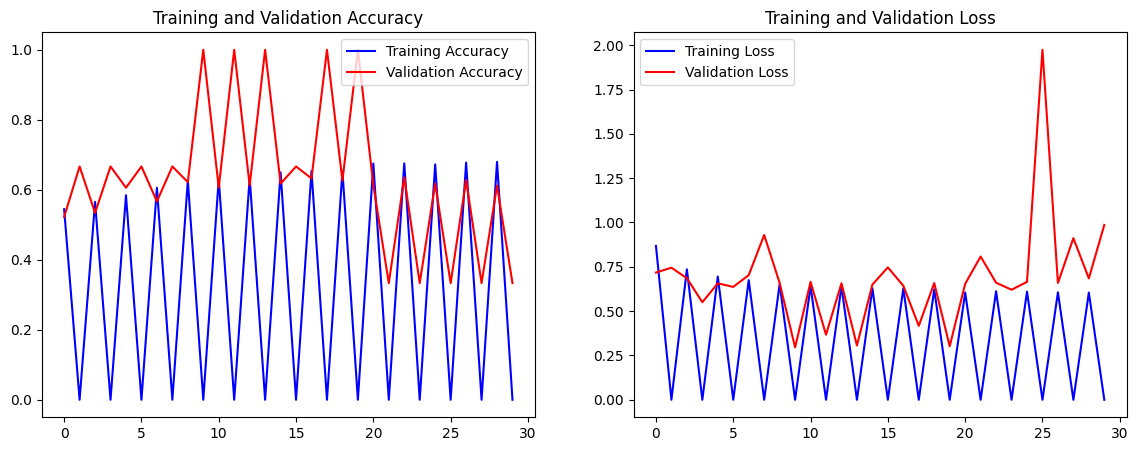

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create data generators with a batch size of 8 and data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    '/content/DATASET_PRJ/train',
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',  # Set to 'binary' for binary classification
    subset='training'
)

# Validation generator
val_generator = train_datagen.flow_from_directory(
    '/content/DATASET_PRJ/train',
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',  # Set to 'binary' for binary classification
    subset='validation'
)

# Test generator
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    '/content/DATASET_PRJ/test',
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    shuffle=False
)

# Define an enhanced CNN model for binary classification
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # 1 unit with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define a learning rate reduction callback
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[lr_reduction]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions on the test set
test_generator.reset()
test_preds = model.predict(test_generator)
test_y_pred = (test_preds > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions
test_y_true = test_generator.classes

# Generate and display the classification report for the test set
print("Test Classification Report:")
print(classification_report(test_y_true, test_y_pred, target_names=list(test_generator.class_indices.keys())))

# Calculate and display class-wise accuracy for the test set
test_report = classification_report(test_y_true, test_y_pred, target_names=list(test_generator.class_indices.keys()), output_dict=True)
test_class_accuracies = {class_name: metrics['recall'] for class_name, metrics in test_report.items() if class_name != 'accuracy'}
test_class_accuracies_df = pd.DataFrame(list(test_class_accuracies.items()), columns=['Class', 'Accuracy'])

print("\nClass Accuracy for Each Class on Test Set:")
print(test_class_accuracies_df)

# Plotting training and validation accuracy/loss
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# Visualize training history
plot_training_history(history)

# Save the model
model.save('enhanced_autism_binary_model_2.h5')


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5606 - loss: 0.7467
Test Accuracy: 62.27%
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
Confusion Matrix:
[[313 252]
 [ 72 224]]
Sensitivity (Recall): 0.7568
Specificity: 0.5540
Precision: 0.4706
Accuracy: 0.6237
F1-Score: 0.5803

Classification Report:
              precision    recall  f1-score   support

    AUTISTIC       0.81      0.55      0.66       565
NON AUTISTIC       0.47      0.76      0.58       296

    accuracy                           0.62       861
   macro avg       0.64      0.66      0.62       861
weighted avg       0.70      0.62      0.63       861



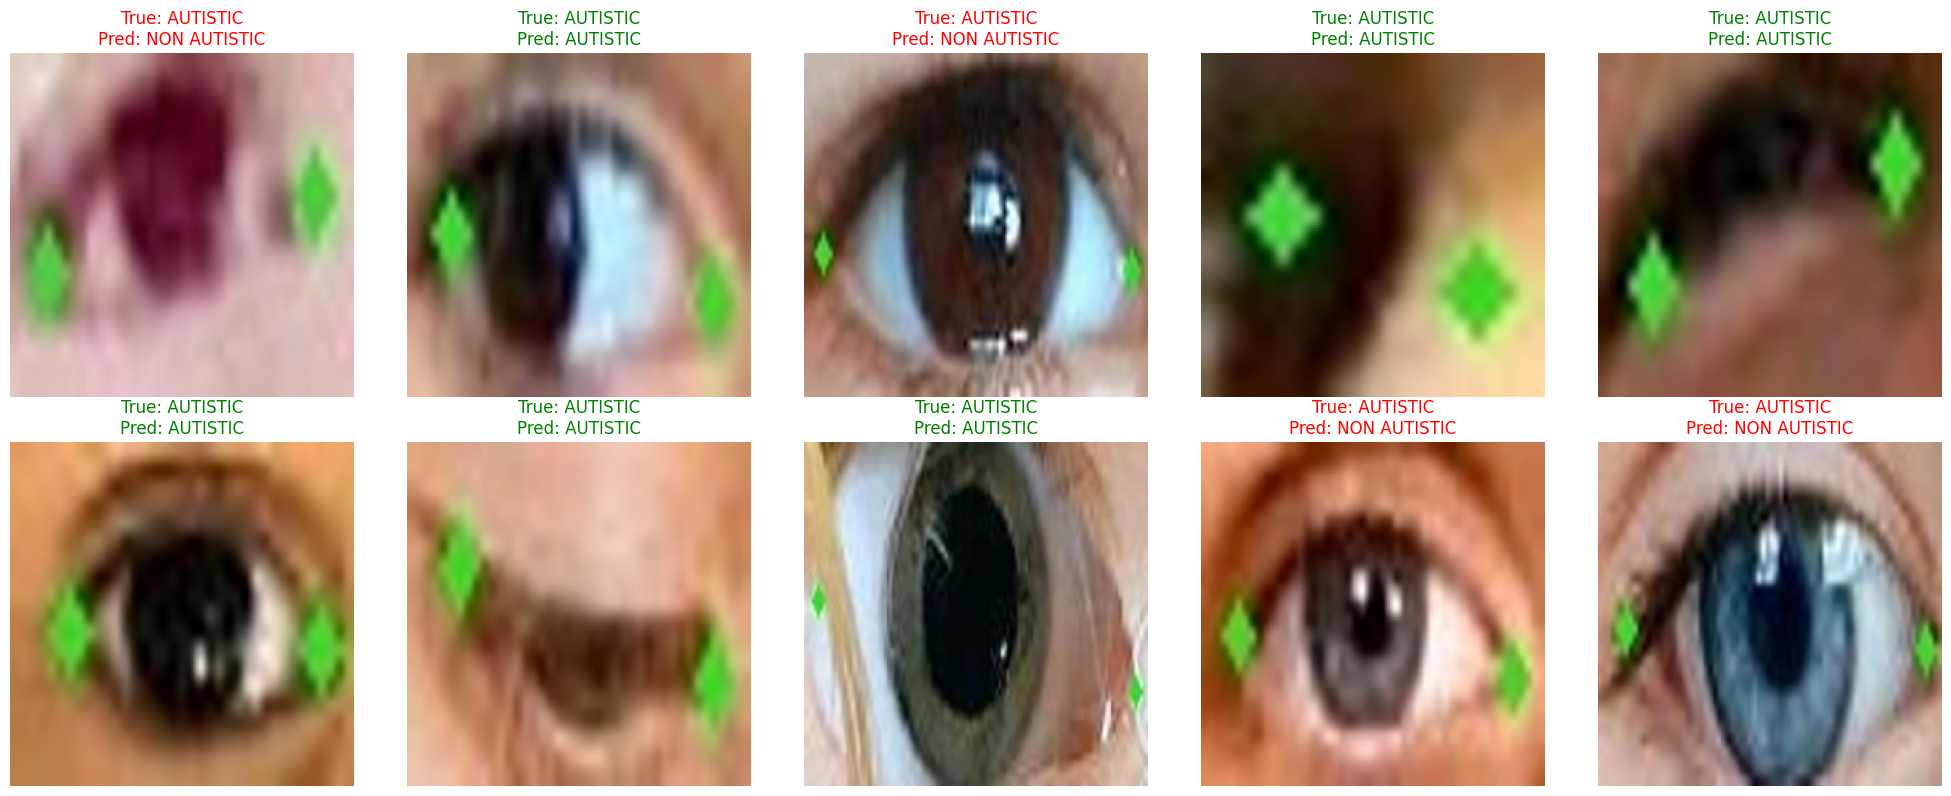

In [6]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions on the test set
test_generator.reset()
test_preds = model.predict(test_generator)
test_y_pred = (test_preds > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions
test_y_true = test_generator.classes  # Ground truth labels

# Compute confusion matrix and other metrics
conf_matrix = confusion_matrix(test_y_true, test_y_pred)

# Sensitivity (Recall), Specificity, Precision, Accuracy, F1-Score
TN, FP, FN, TP = conf_matrix.ravel()
sensitivity = TP / (TP + FN)  # Recall
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")

# Full classification report
print("\nClassification Report:")
print(classification_report(test_y_true, test_y_pred, target_names=list(test_generator.class_indices.keys())))

# Visualize first 10 images with true labels and predictions
def visualize_predictions(generator, true_labels, predicted_labels, num_images=10):
    generator.reset()
    class_names = list(generator.class_indices.keys())
    img_paths = generator.filepaths[:num_images]  # Filepaths for the first 10 images
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # Create a 2x5 grid for images

    for i, ax in enumerate(axes.flatten()):
        # Load and preprocess the image
        img = load_img(img_paths[i], target_size=(224, 224))
        img_array = img_to_array(img) / 255.0

        # Display the image
        ax.imshow(img_array)
        ax.axis('off')

        # Get the true and predicted labels
        true_label = class_names[true_labels[i]]
        pred_label = class_names[predicted_labels[i]]

        # Set the title with true and predicted labels
        ax.set_title(f"True: {true_label}\nPred: {pred_label}",
                     color="green" if true_label == pred_label else "red",
                     fontsize=12)

    plt.tight_layout()
    plt.show()

# Visualize predictions for the first 10 images
visualize_predictions(test_generator, test_y_true, test_y_pred, num_images=10)


Found 3792 images belonging to 2 classes.
Found 947 images belonging to 2 classes.
Found 861 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 512)                 │           2,0

 Total params: 656,577 (2.50 MB)

 Trainable params: 654,081 (2.50 MB)

 Non-trainable params: 2,496 (9.75 KB)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


474/474 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.5528 - loss: 0.9675 - val_accuracy: 0.5646 - val_loss: 0.8449 - learning_rate: 0.0010
Epoch 2/30


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


474/474 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2282 - learning_rate: 0.0010
Epoch 3/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.5840 - loss: 0.7548 - val_accuracy: 0.5763 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 4/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 0s 38us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.7150 - learning_rate: 0.0010
Epoch 5/30
473/474 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6038 - loss: 0.6841
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
474/474 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.6038 - loss: 0.6841 - val_accuracy: 0.5869 - val_loss: 0.7003 - learning_rate: 0.0010
Epoch 6/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.9631 - learning_rate: 5.0000e-04
Epoch 7/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accu

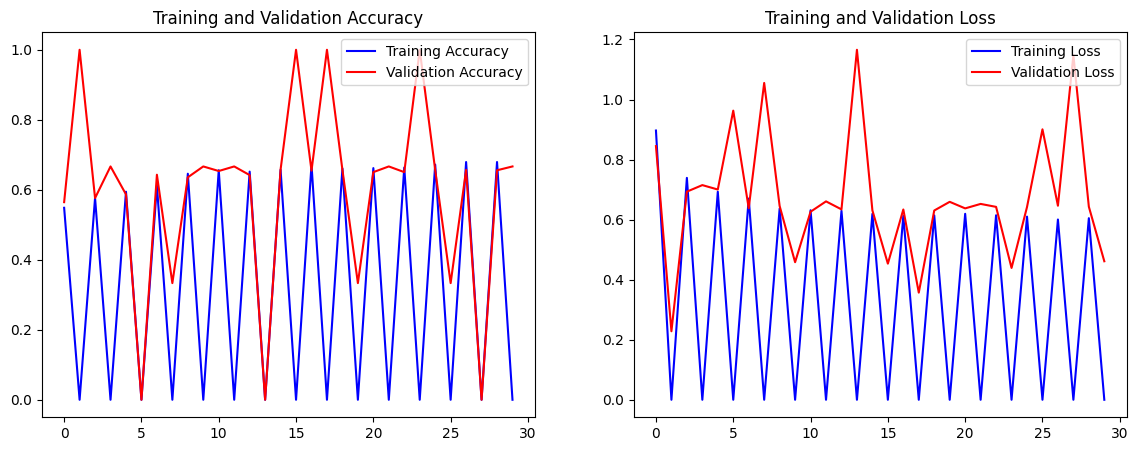

107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8203 - loss: 0.4241
Test Accuracy: 71.61%
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
Confusion Matrix:
[[488  77]
 [168 128]]
Sensitivity (Recall): 0.4324
Specificity: 0.8637
Precision: 0.6244
Accuracy: 0.7154
F1-Score: 0.5110

Classification Report:
              precision    recall  f1-score   support

    AUTISTIC       0.74      0.86      0.80       565
NON AUTISTIC       0.62      0.43      0.51       296

    accuracy                           0.72       861
   macro avg       0.68      0.65      0.66       861
weighted avg       0.70      0.72      0.70       861



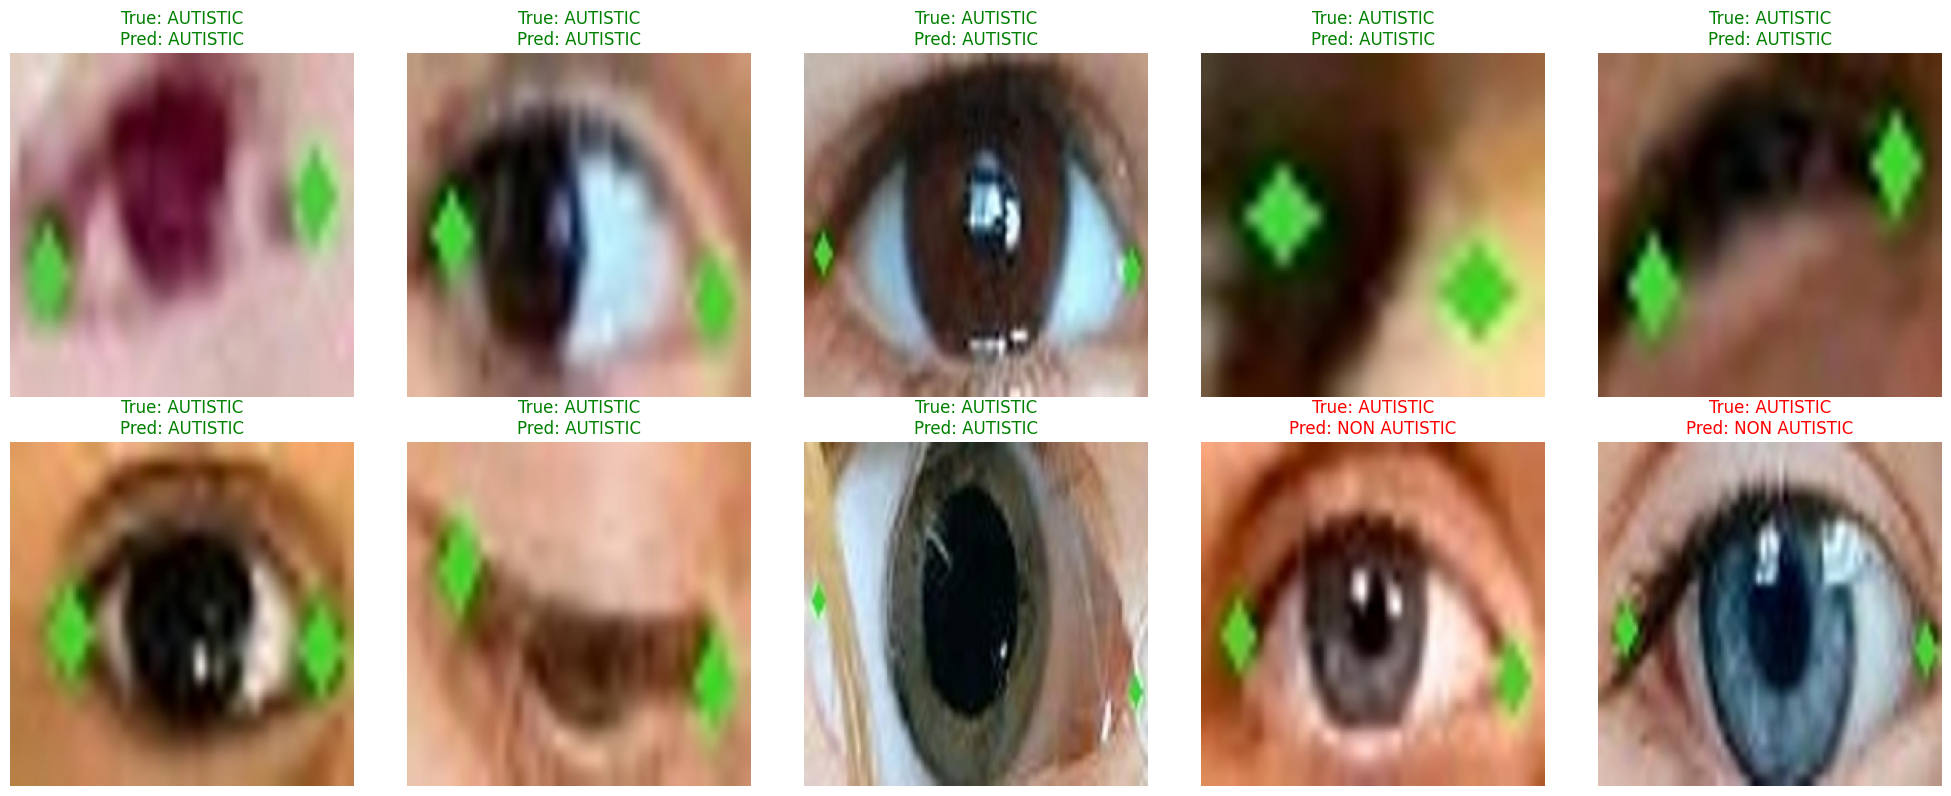

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create data generators without augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Only rescaling
    validation_split=0.2  # Split into training and validation
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    '/content/DATASET_PRJ/train',
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    subset='training'
)

# Validation generator
val_generator = train_datagen.flow_from_directory(
    '/content/DATASET_PRJ/train',
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    subset='validation'
)

# Test generator
test_datagen = ImageDataGenerator(rescale=1.0/255)  # Only rescaling
test_generator = test_datagen.flow_from_directory(
    '/content/DATASET_PRJ/test',
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    shuffle=False
)

# Define an enhanced CNN model for binary classification
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # 1 unit with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define a learning rate reduction callback
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[lr_reduction]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions on the test set
test_generator.reset()
test_preds = model.predict(test_generator)
test_y_pred = (test_preds > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions
test_y_true = test_generator.classes

# Generate and display the classification report for the test set
print("Test Classification Report:")
print(classification_report(test_y_true, test_y_pred, target_names=list(test_generator.class_indices.keys())))

# Calculate and display class-wise accuracy for the test set
test_report = classification_report(test_y_true, test_y_pred, target_names=list(test_generator.class_indices.keys()), output_dict=True)
test_class_accuracies = {class_name: metrics['recall'] for class_name, metrics in test_report.items() if class_name != 'accuracy'}
test_class_accuracies_df = pd.DataFrame(list(test_class_accuracies.items()), columns=['Class', 'Accuracy'])

print("\nClass Accuracy for Each Class on Test Set:")
print(test_class_accuracies_df)

# Plotting training and validation accuracy/loss
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# Visualize training history
plot_training_history(history)

# Save the model
model.save('enhanced_autism_binary_model_no_aug.h5')
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions on the test set
test_generator.reset()
test_preds = model.predict(test_generator)
test_y_pred = (test_preds > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions
test_y_true = test_generator.classes  # Ground truth labels

# Compute confusion matrix and other metrics
conf_matrix = confusion_matrix(test_y_true, test_y_pred)

# Sensitivity (Recall), Specificity, Precision, Accuracy, F1-Score
TN, FP, FN, TP = conf_matrix.ravel()
sensitivity = TP / (TP + FN)  # Recall
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")

# Full classification report
print("\nClassification Report:")
print(classification_report(test_y_true, test_y_pred, target_names=list(test_generator.class_indices.keys())))

# Visualize first 10 images with true labels and predictions
def visualize_predictions(generator, true_labels, predicted_labels, num_images=10):
    generator.reset()
    class_names = list(generator.class_indices.keys())
    img_paths = generator.filepaths[:num_images]  # Filepaths for the first 10 images
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # Create a 2x5 grid for images

    for i, ax in enumerate(axes.flatten()):
        # Load and preprocess the image
        img = load_img(img_paths[i], target_size=(224, 224))
        img_array = img_to_array(img) / 255.0

        # Display the image
        ax.imshow(img_array)
        ax.axis('off')

        # Get the true and predicted labels
        true_label = class_names[true_labels[i]]
        pred_label = class_names[predicted_labels[i]]

        # Set the title with true and predicted labels
        ax.set_title(f"True: {true_label}\nPred: {pred_label}",
                     color="green" if true_label == pred_label else "red",
                     fontsize=12)

    plt.tight_layout()
    plt.show()

# Visualize predictions for the first 10 images
visualize_predictions(test_generator, test_y_true, test_y_pred, num_images=10)


In [8]:
import os
import cv2

# Directories
dataset_dir = '/content/DATASET_PRJ'
output_folder_gaussian = '/content/DATASET_PRJ_output_gaussian'

# Create necessary output directory
os.makedirs(output_folder_gaussian, exist_ok=True)

def apply_gaussian_filter(image, kernel_size=7):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def process_images_with_gaussian(folder_path, output_folder):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isdir(file_path):
            process_images_with_gaussian(file_path, output_folder)
        elif filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            output_path = os.path.join(output_folder, os.path.relpath(file_path, dataset_dir))
            os.makedirs(os.path.dirname(output_path), exist_ok=True)

            try:
                image = cv2.imread(file_path)
                if image is None:
                    print(f"Error: Could not load image from {file_path}")
                    continue

                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                filtered_image = apply_gaussian_filter(gray_image)

                cv2.imwrite(output_path, filtered_image)
                print(f"Gaussian filtered image saved to {output_path}")

            except Exception as e:
                print(f"An error occurred while processing {filename}: {str(e)}")

# Process images in the entire dataset recursively
process_images_with_gaussian(dataset_dir, output_folder_gaussian)


Streaming output truncated to the last 5000 lines.
Gaussian filtered image saved to /content/DATASET_PRJ_output_gaussian/AUTISTIC/LEFT_EYE/1104.jpg
Gaussian filtered image saved to /content/DATASET_PRJ_output_gaussian/AUTISTIC/LEFT_EYE/1278.jpg
Gaussian filtered image saved to /content/DATASET_PRJ_output_gaussian/AUTISTIC/LEFT_EYE/0260.jpg
Gaussian filtered image saved to /content/DATASET_PRJ_output_gaussian/AUTISTIC/LEFT_EYE/1255.jpg
Gaussian filtered image saved to /content/DATASET_PRJ_output_gaussian/AUTISTIC/LEFT_EYE/0274.jpg
Gaussian filtered image saved to /content/DATASET_PRJ_output_gaussian/AUTISTIC/LEFT_EYE/0755.jpg
Gaussian filtered image saved to /content/DATASET_PRJ_output_gaussian/AUTISTIC/LEFT_EYE/1154.jpg
Gaussian filtered image saved to /content/DATASET_PRJ_output_gaussian/AUTISTIC/LEFT_EYE/0453.jpg
Gaussian filtered image saved to /content/DATASET_PRJ_output_gaussian/AUTISTIC/LEFT_EYE/1337.jpg
Gaussian filtered image saved to /content/DATASET_PRJ_output_gaussian/AUTIST

## FILTERED COMPARISON

# WITHOUT AUG AND FILTERED

Found 3792 images belonging to 2 classes.
Found 947 images belonging to 2 classes.
Found 861 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 512)                 │           2,0

 Total params: 656,577 (2.50 MB)

 Trainable params: 654,081 (2.50 MB)

 Non-trainable params: 2,496 (9.75 KB)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


474/474 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.5172 - loss: 0.9616 - val_accuracy: 0.4417 - val_loss: 0.8104 - learning_rate: 0.0010
Epoch 2/30


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


474/474 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.7348 - learning_rate: 0.0010
Epoch 3/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.5571 - loss: 0.7748 - val_accuracy: 0.6208 - val_loss: 0.6471 - learning_rate: 0.0010
Epoch 4/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 0s 78us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3333 - val_loss: 0.7499 - learning_rate: 0.0010
Epoch 5/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.5917 - loss: 0.6952 - val_accuracy: 0.5932 - val_loss: 0.8050 - learning_rate: 0.0010
Epoch 6/30

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
474/474 ━━━━━━━━━━━━━━━━━━━━ 0s 47us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3333 - val_loss: 0.8036 - learning_rate: 0.0010
Epoch 7/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.6472 - loss: 0.6467 - val_accuracy: 0.6133 - val_loss: 0.6726 - learning_r

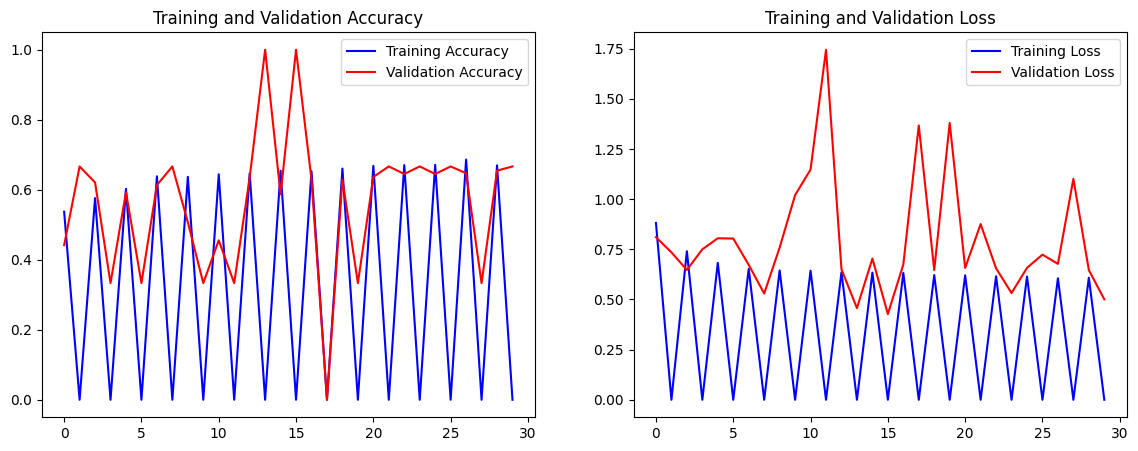

107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8094 - loss: 0.4888
Test Accuracy: 72.90%
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Confusion Matrix:
[[479  86]
 [147 149]]
Sensitivity (Recall): 0.5034
Specificity: 0.8478
Precision: 0.6340
Accuracy: 0.7294
F1-Score: 0.5612

Classification Report:
              precision    recall  f1-score   support

    AUTISTIC       0.77      0.85      0.80       565
NON AUTISTIC       0.63      0.50      0.56       296

    accuracy                           0.73       861
   macro avg       0.70      0.68      0.68       861
weighted avg       0.72      0.73      0.72       861



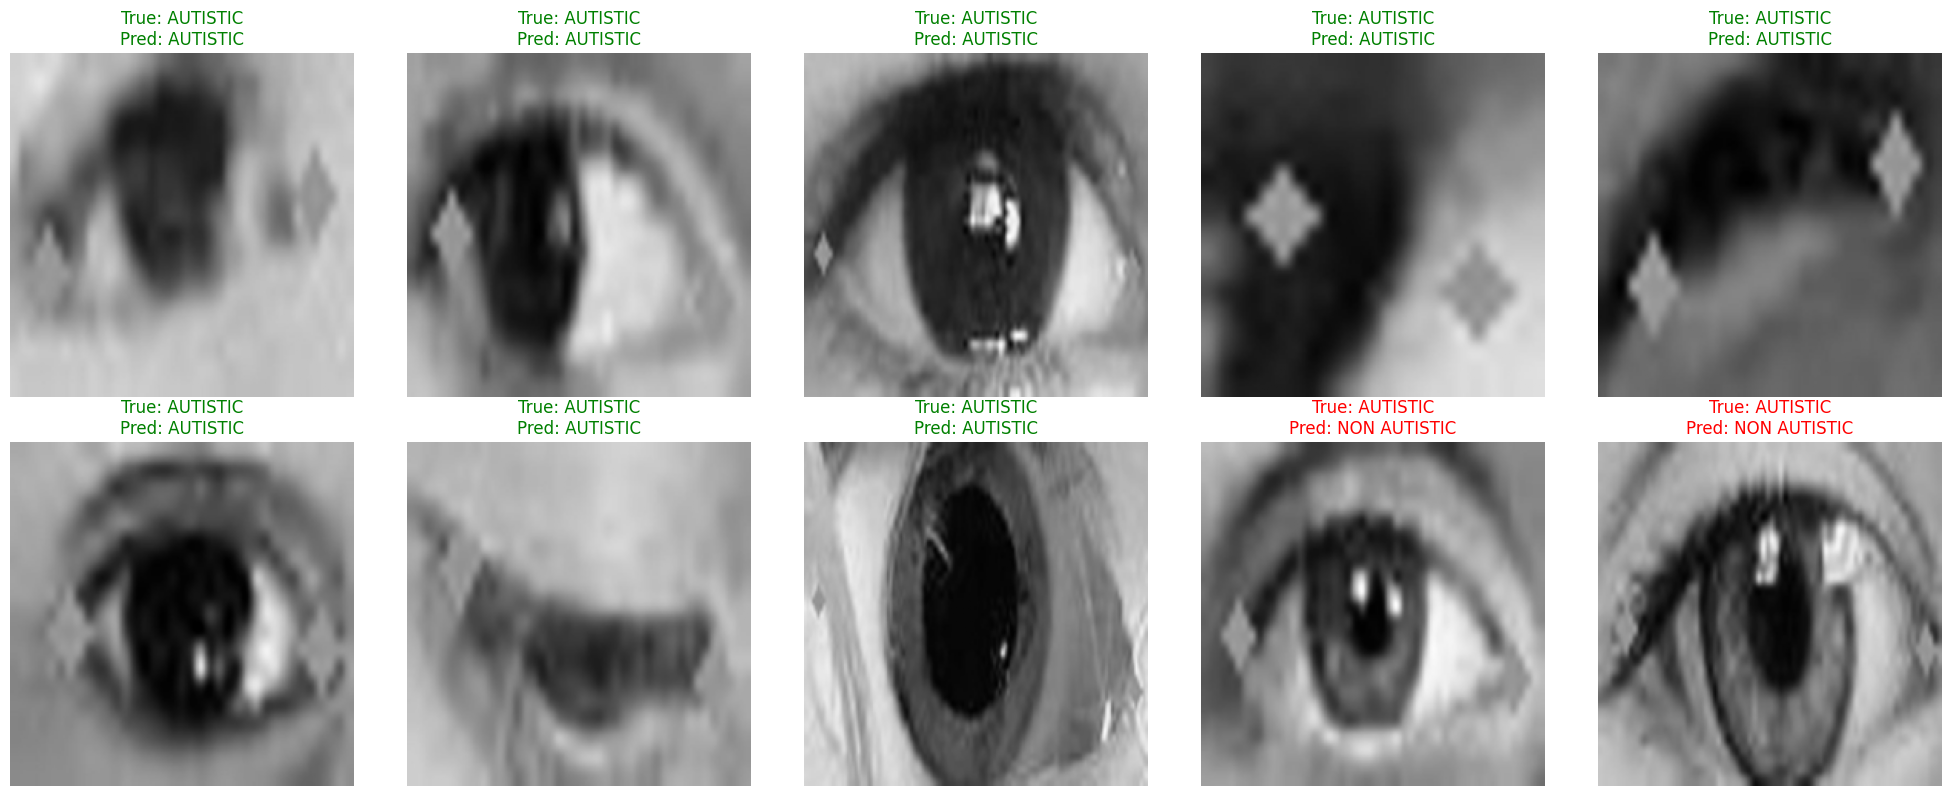

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create data generators without augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Only rescaling
    validation_split=0.2  # Split into training and validation
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    '/content/DATASET_PRJ_output_gaussian/train',
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    subset='training'
)

# Validation generator
val_generator = train_datagen.flow_from_directory(
    '/content/DATASET_PRJ_output_gaussian/train',
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    subset='validation'
)

# Test generator
test_datagen = ImageDataGenerator(rescale=1.0/255)  # Only rescaling
test_generator = test_datagen.flow_from_directory(
    '/content/DATASET_PRJ_output_gaussian/test',
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    shuffle=False
)

# Define an enhanced CNN model for binary classification
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # 1 unit with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define a learning rate reduction callback
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[lr_reduction]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions on the test set
test_generator.reset()
test_preds = model.predict(test_generator)
test_y_pred = (test_preds > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions
test_y_true = test_generator.classes

# Generate and display the classification report for the test set
print("Test Classification Report:")
print(classification_report(test_y_true, test_y_pred, target_names=list(test_generator.class_indices.keys())))

# Calculate and display class-wise accuracy for the test set
test_report = classification_report(test_y_true, test_y_pred, target_names=list(test_generator.class_indices.keys()), output_dict=True)
test_class_accuracies = {class_name: metrics['recall'] for class_name, metrics in test_report.items() if class_name != 'accuracy'}
test_class_accuracies_df = pd.DataFrame(list(test_class_accuracies.items()), columns=['Class', 'Accuracy'])

print("\nClass Accuracy for Each Class on Test Set:")
print(test_class_accuracies_df)

# Plotting training and validation accuracy/loss
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# Visualize training history
plot_training_history(history)

# Save the model
model.save('enhanced_autism_binary_model_no_aug_with_filter.h5')
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions on the test set
test_generator.reset()
test_preds = model.predict(test_generator)
test_y_pred = (test_preds > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions
test_y_true = test_generator.classes  # Ground truth labels

# Compute confusion matrix and other metrics
conf_matrix = confusion_matrix(test_y_true, test_y_pred)

# Sensitivity (Recall), Specificity, Precision, Accuracy, F1-Score
TN, FP, FN, TP = conf_matrix.ravel()
sensitivity = TP / (TP + FN)  # Recall
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")

# Full classification report
print("\nClassification Report:")
print(classification_report(test_y_true, test_y_pred, target_names=list(test_generator.class_indices.keys())))

# Visualize first 10 images with true labels and predictions
def visualize_predictions(generator, true_labels, predicted_labels, num_images=10):
    generator.reset()
    class_names = list(generator.class_indices.keys())
    img_paths = generator.filepaths[:num_images]  # Filepaths for the first 10 images
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # Create a 2x5 grid for images

    for i, ax in enumerate(axes.flatten()):
        # Load and preprocess the image
        img = load_img(img_paths[i], target_size=(224, 224))
        img_array = img_to_array(img) / 255.0

        # Display the image
        ax.imshow(img_array)
        ax.axis('off')

        # Get the true and predicted labels
        true_label = class_names[true_labels[i]]
        pred_label = class_names[predicted_labels[i]]

        # Set the title with true and predicted labels
        ax.set_title(f"True: {true_label}\nPred: {pred_label}",
                     color="green" if true_label == pred_label else "red",
                     fontsize=12)

    plt.tight_layout()
    plt.show()

# Visualize predictions for the first 10 images
visualize_predictions(test_generator, test_y_true, test_y_pred, num_images=10)


# WITH AUG AND FILTERED

Found 3792 images belonging to 2 classes.
Found 947 images belonging to 2 classes.
Found 861 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 512)                 │           2,0

 Total params: 656,577 (2.50 MB)

 Trainable params: 654,081 (2.50 MB)

 Non-trainable params: 2,496 (9.75 KB)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


474/474 ━━━━━━━━━━━━━━━━━━━━ 79s 141ms/step - accuracy: 0.5177 - loss: 1.0070 - val_accuracy: 0.5636 - val_loss: 0.6686 - learning_rate: 0.0010
Epoch 2/30


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


474/474 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.5552 - learning_rate: 0.0010
Epoch 3/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 74s 139ms/step - accuracy: 0.5628 - loss: 0.7562 - val_accuracy: 0.5890 - val_loss: 0.6901 - learning_rate: 0.0010
Epoch 4/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 0s 88us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.3935 - learning_rate: 0.0010
Epoch 5/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 67s 139ms/step - accuracy: 0.5938 - loss: 0.6970 - val_accuracy: 0.4354 - val_loss: 1.3735 - learning_rate: 0.0010
Epoch 6/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 0s 85us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 2.4234 - learning_rate: 0.0010
Epoch 7/30
472/474 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.6024 - loss: 0.6792
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
474/474 ━━━━━━━━━━━━━━━━━━━━ 82s 140ms/step - acc

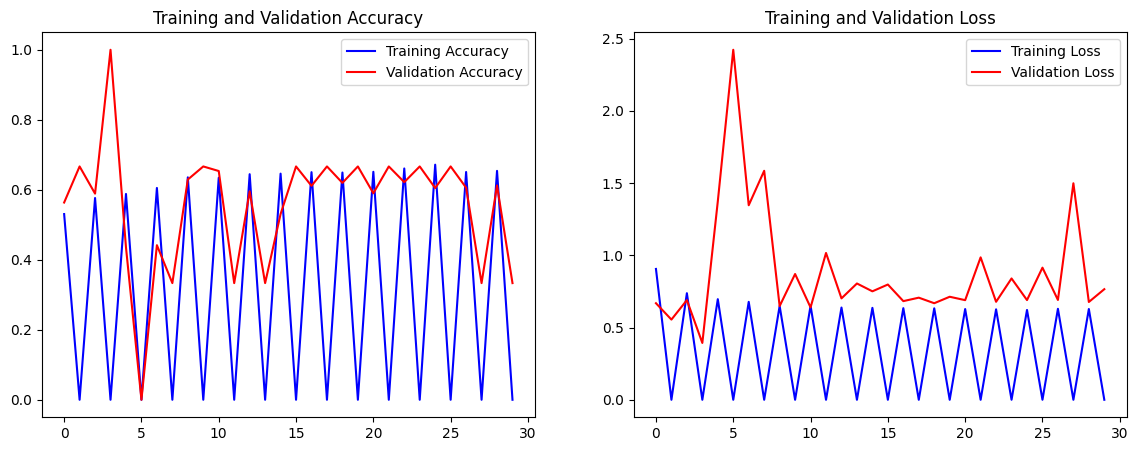

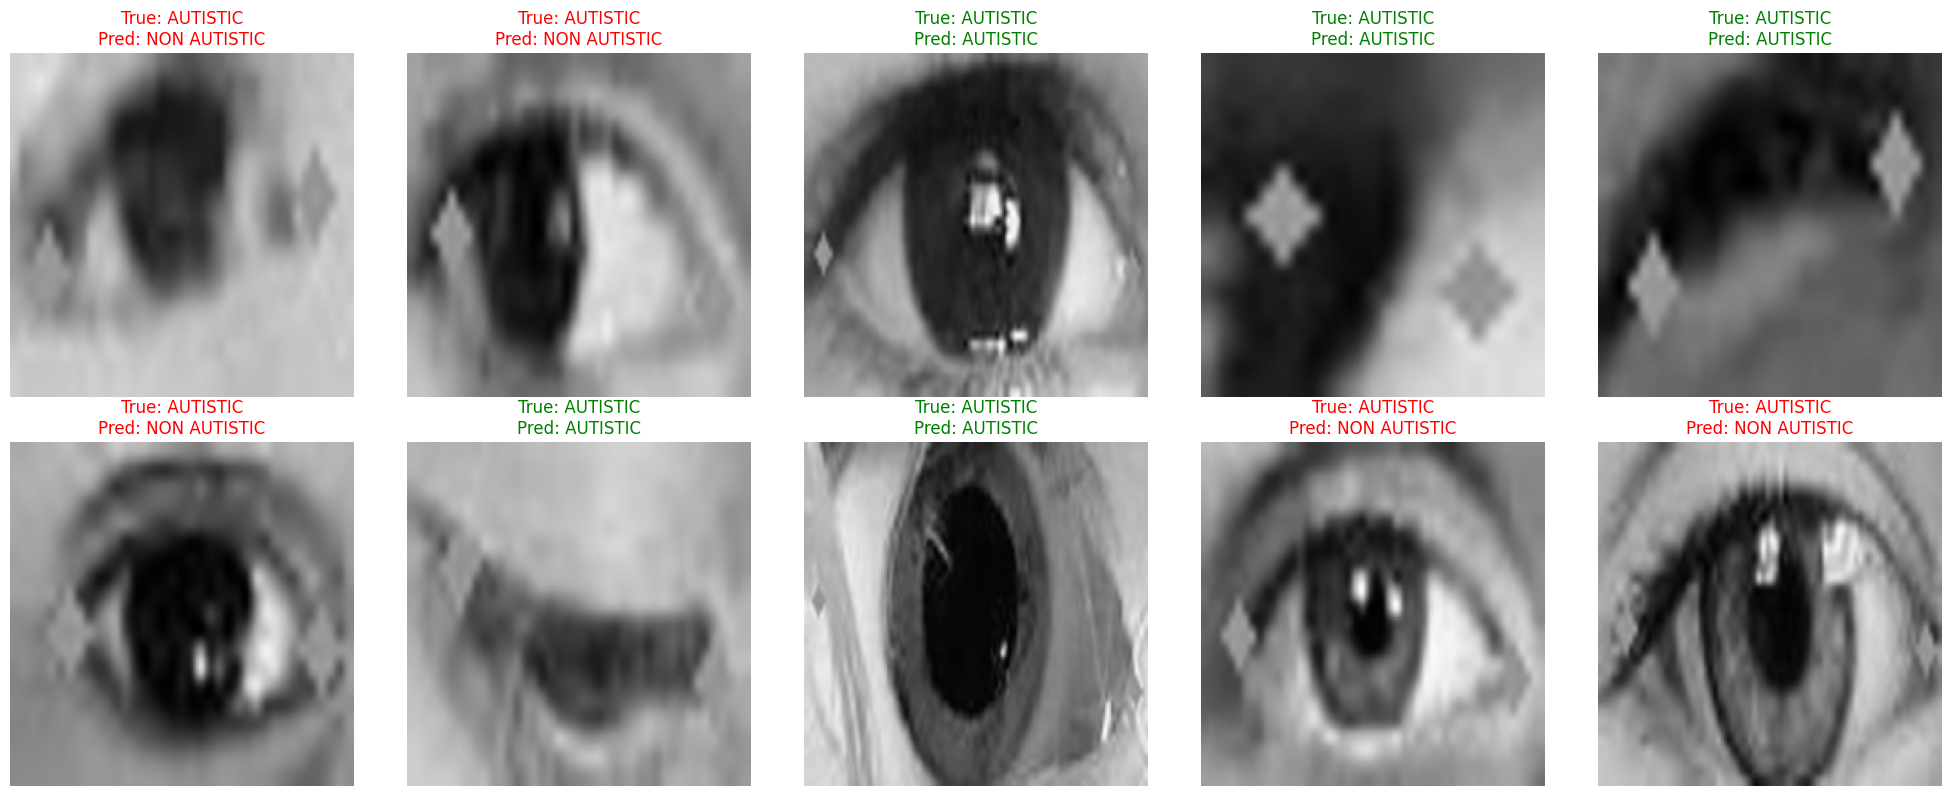

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Data augmentation and generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,

    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/DATASET_PRJ_output_gaussian/train',
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/DATASET_PRJ_output_gaussian/train',
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    '/content/DATASET_PRJ_output_gaussian/test',
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    shuffle=False
)

# Enhanced CNN model
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.2),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),

        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
model.summary()

# Learning rate reduction callback
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[lr_reduction]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predictions and evaluation
test_generator.reset()
test_preds = model.predict(test_generator)
test_y_pred = (test_preds > 0.5).astype(int).flatten()
test_y_true = test_generator.classes

# Confusion matrix and metrics
conf_matrix = confusion_matrix(test_y_true, test_y_pred)
TN, FP, FN, TP = conf_matrix.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(test_y_true, test_y_pred, target_names=list(test_generator.class_indices.keys())))

# Visualization of training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Visualization of predictions
def visualize_predictions(generator, true_labels, predicted_labels, num_images=10):
    generator.reset()
    class_names = list(generator.class_indices.keys())
    img_paths = generator.filepaths[:num_images]
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))

    for i, ax in enumerate(axes.flatten()):
        img = load_img(img_paths[i], target_size=(224, 224))
        img_array = img_to_array(img) / 255.0

        ax.imshow(img_array)
        ax.axis('off')

        true_label = class_names[true_labels[i]]
        pred_label = class_names[predicted_labels[i]]

        ax.set_title(f"True: {true_label}\nPred: {pred_label}",
                     color="green" if true_label == pred_label else "red",
                     fontsize=12)

    plt.tight_layout()
    plt.show()

visualize_predictions(test_generator, test_y_true, test_y_pred, num_images=10)

# Save the model
model.save('enhanced_autism_binary_model_with_aug_and_with_filter.h5')
